In [1]:
# IgPhyML visualization in R
# graphing individual data
# displaying the maximum likelihood of HLP19 parameters

#!/usr/bin/R
library(alakazam)
library(ggplot2)
library(ape)
library(dplyr)
library(igraph)

#read in three different samples
db_a = readIgphyml("a_heavy_germ-pass_igphyml-pass.tab",id="A")
db_r = readIgphyml("r_heavy_germ-pass_igphyml-pass.tab",id="R")
db_vac = readIgphyml("vac_heavy_germ-pass_igphyml-pass.tab",id="VAC")
db_wt = readIgphyml("wt_heavy_germ-pass_igphyml-pass.tab",id="WT") 

#print out parameter values for the naive sample
head(db_wt$param[1,])

#****************************************
##### there is no upper or lower ci #####
#****************************************

Loading required package: ggplot2

As of v1.0.0 the AIRR Rearrangement schema is now the default file format.
A description of the standard is available at https://docs.airr-community.org.
The legacy Change-O format is supported through arguments to each function
that allow the input column names to be explicitly defined.


Attaching package: ‘ape’


The following object is masked from ‘package:alakazam’:

    getMRCA



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:ape’:

    edges, mst, ring


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




,clone,nseq,nsite,tree_length,lhood,kappa_mle,omega_fwr_mle,omega_cdr_mle,wrc_2_mle,gyw_0_mle,wa_1_mle,tw_0_mle,syc_2_mle,grs_0_mle,id
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,REPERTOIRE,5988,120.0544,0.0023,-91732.82,1.6258,0.94,0.9225,0.2819,0.4636,0.0858,-0.1115,-0.99,-0.8896,WT


In [2]:
# combine objects into a dataframe to display HLP19 parameter
comb_hlp19 = combineIgphyml(list(db_a, db_r, db_vac, db_wt),format="long")

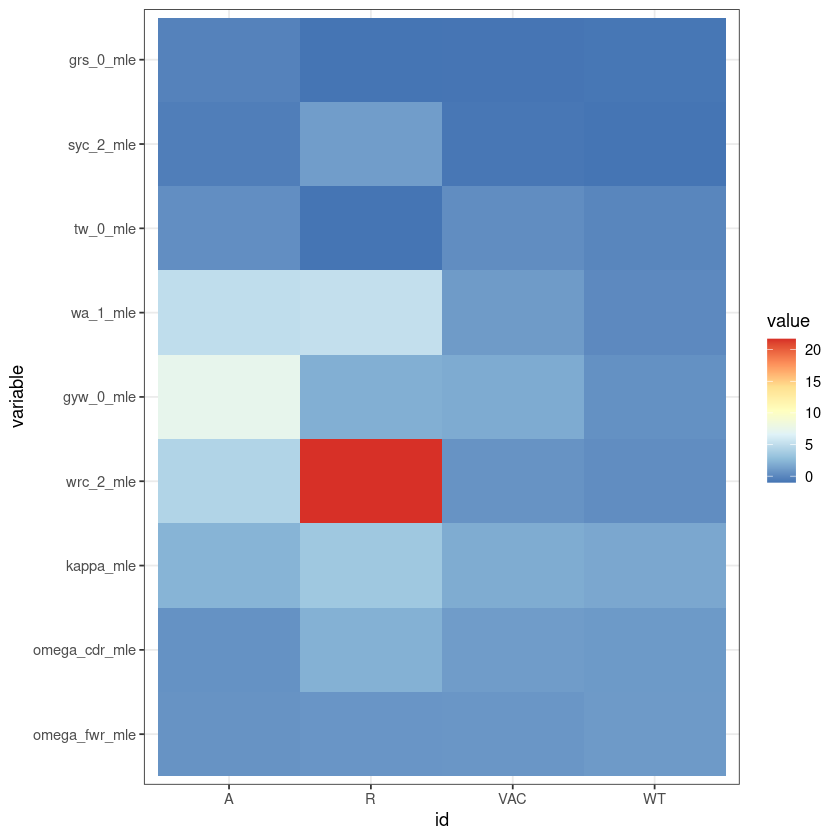

In [3]:
# display MLE parameter
ggplot(comb_hlp19[grepl("_mle",comb_hlp19$variable),],
   aes(x=id,y=variable,fill=value)) + geom_tile() +
   theme_bw() + scale_fill_distiller(palette="RdYlBu")

In [4]:
# combine objects into a dataframe to display CDR mutation rate
comb_cdr = combineIgphyml(list(db_a, db_r, db_vac, db_wt),format="wide")

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'omega_cdr_lci' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. 

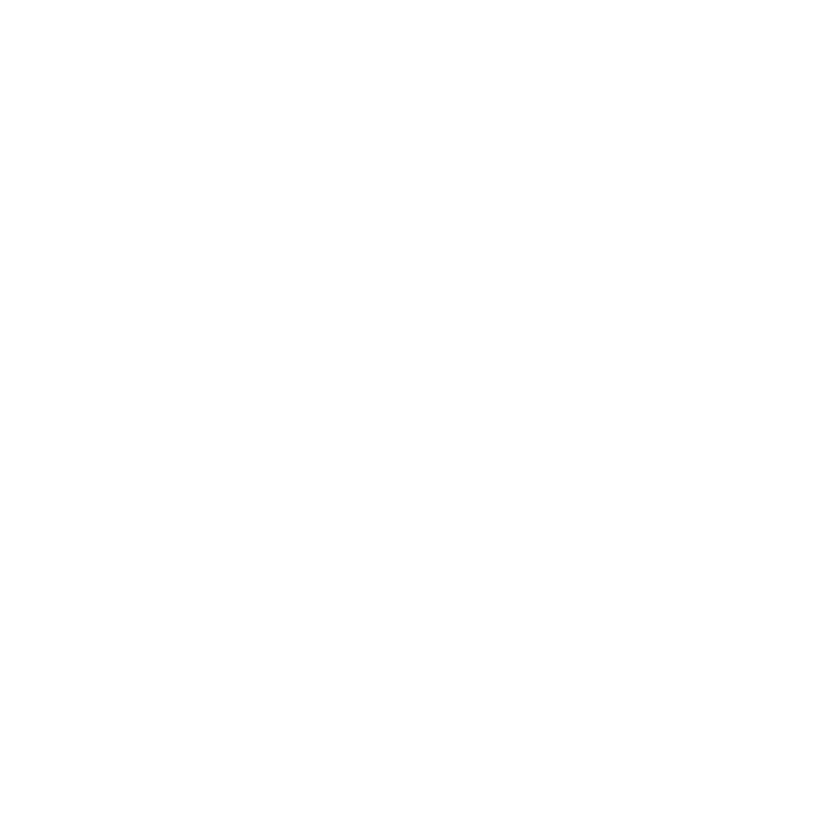

In [5]:
#compare CDR dN/dS for all samples
ggplot(comb_cdr,aes(x=id,y=omega_cdr_mle, ymin=omega_cdr_lci,
  ymax=omega_cdr_uci)) + geom_point() +
  geom_errorbar(width=0.1) + theme_bw()

#****************************************
##### there is no upper or lower ci #####
#****************************************